In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_df = pd.read_csv('../../data/processed/downsampled/full_df.csv', index_col=[0,1])

In [3]:
full_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,Cooler condition,Valve Condition,Internal pump leakage,Hydraulic accumulator / bar,stable flag
count,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.00000,...,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000
mean,172.932035,192.875929,196.025099,196.110471,196.102371,196.044390,196.042953,196.049555,196.046548,199.41870,...,172.903084,172.892930,172.888615,172.888431,172.890211,41.240816,90.693878,0.669388,107.199546,0.342857
std,544.080575,663.471954,675.918080,676.287581,676.273431,676.065348,676.079500,676.127960,676.145227,675.33944,...,544.159750,544.124178,544.114948,544.111535,544.093870,42.374097,10.679522,0.817058,16.432340,0.474671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,73.000000,0.000000,90.000000,0.000000
25%,8.274000,0.117000,0.003000,0.003000,0.003000,0.003000,0.003000,0.003000,0.003000,0.68700,...,7.713000,7.718000,7.708000,7.709000,7.709000,3.000000,80.000000,0.000000,90.000000,0.000000
50%,27.300000,9.626000,9.623000,9.615000,9.617000,9.626000,9.622000,9.624000,9.617000,10.05300,...,27.071000,27.055000,27.055000,27.089000,27.234000,20.000000,100.000000,0.000000,100.000000,0.000000
75%,58.895000,46.480000,46.472000,46.473000,46.453000,46.423000,46.435000,46.410000,46.392000,49.47300,...,58.891000,58.891000,58.883000,58.895000,58.898000,100.000000,100.000000,1.000000,130.000000,1.000000
max,2863.200000,2964.800000,2989.200000,2987.200000,2985.800000,2987.200000,2989.000000,2991.000000,2989.200000,2989.20000,...,2864.400000,2862.200000,2863.800000,2860.200000,2861.600000,100.000000,100.000000,2.000000,130.000000,1.000000


In [4]:
means = full_df.groupby('Sensor Name').mean().T[:60]
stds = full_df.groupby('Sensor Name').std().T[:60]

In [5]:
print(means.keys())

Index(['CE', 'CP', 'EPS1_d', 'FS1_d', 'FS2_d', 'PS1_d', 'PS2_d', 'PS3_d',
       'PS4_d', 'PS5_d', 'PS6_d', 'SE', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1'],
      dtype='object', name='Sensor Name')


In [66]:
def plot_keys(means, stds, keys, ylabel):
    fig = plt.figure(figsize=(16,9))
    for key in keys:
        plt.plot(means.index.values, means[key], label=key)
    plt.legend()
    plt.ylabel(ylabel)
    plt.xlabel('Time of Cycle /s')

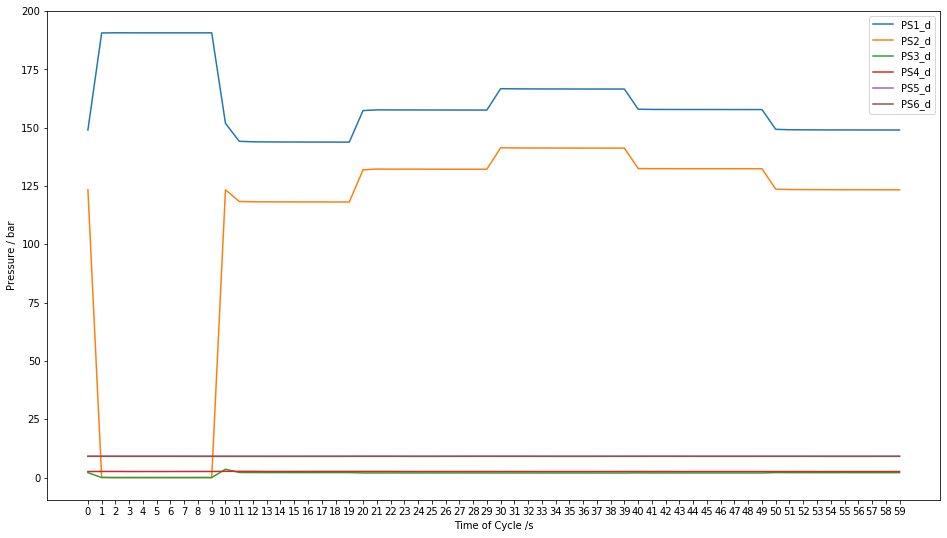

In [67]:
plot_keys(means, stds, 
          ['PS1_d', 'PS2_d', 'PS3_d', 'PS4_d', 'PS5_d', 'PS6_d'],
          'Pressure / bar'
          )

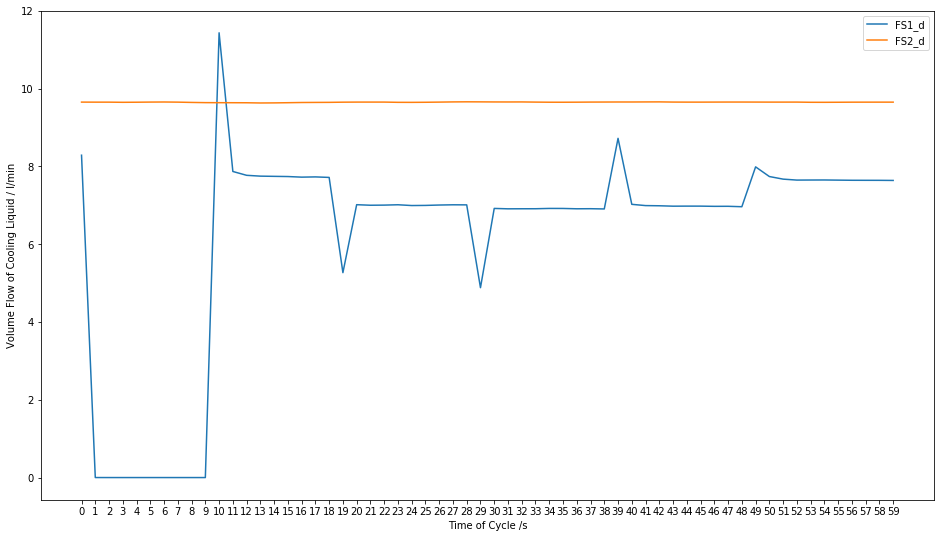

In [69]:
plot_keys(means, stds,
         ['FS1_d', 'FS2_d'],
         'Volume Flow of Cooling Liquid / l/min'
         )